<a href="https://colab.research.google.com/github/pelms2002/Car_Price_Prediction_Using_Machine_Learning_-Regression-/blob/main/Mama_Tee_Restaurant_%E2%80%93_Regression_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mama Tee Restaurant – Regression Analysis Project

## 1. Project Overview

This project demonstrates a **complete regression analysis** using machine learning for **Mama Tee Restaurant**.

The aim is to **predict the tip amount** a customer will give based on:

* Total bill
* Gender
* Smoker status
* Day
* Time (Lunch/Dinner)
* Group size

This project is written in **simple, beginner-friendly language** and follows standard **academic machine learning steps**.

---

## 2. Understanding Regression (Beginner Explanation)

**Regression** is a type of machine learning used to **predict numerical values**.

Example:

* Predicting tip amount (₦)
* Predicting house price
* Predicting sales revenue

👉 In this project, **Tip** is a number, so we use **Regression**, not Classification.

---

In [ ]:

## 3. Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 4. Load the Dataset
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tips.csv')
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [ ]:
## 5. Data Understanding
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


## 6. Data Cleaning Process

### 6.1 Remove Irrelevant Data

All columns are relevant, so **no column is removed**.


In [ ]:
### 6.2 Deduplication
df.duplicated().sum()

np.int64(1)

In [ ]:
### 6.3 Fix Structural Errors
df['gender'] = df['gender'].str.lower()
df['smoker'] = df['smoker'].str.lower()
df['day'] = df['day'].str.capitalize()
df['time'] = df['time'].str.capitalize()

In [ ]:

### 6.4 Handle Missing Values
df.isnull().sum()

,0
total_bill,0
tip,0
gender,0
smoker,0
day,0
time,0
size,0


<Axes: xlabel='tip'>

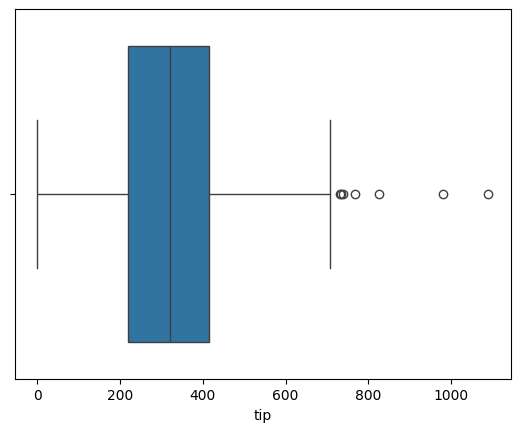

In [ ]:
### 6.5 Outlier Check
sns.boxplot(x=df['tip'])


In [ ]:
### 6.6 Data Validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


Text(0.5, 1.0, 'Total Bill vs Tip')

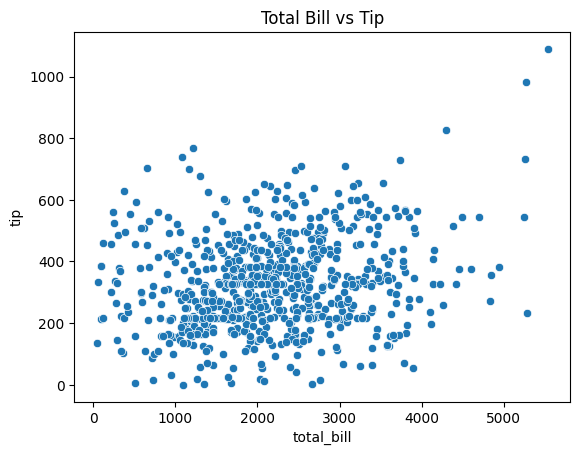

In [ ]:
## 7. Exploratory Data Analysis (EDA)

### 7.1 Relationship Between Total Bill and Tip
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')

**Observation:**
As the total bill increases, the tip also increases.


<Axes: xlabel='gender', ylabel='tip'>

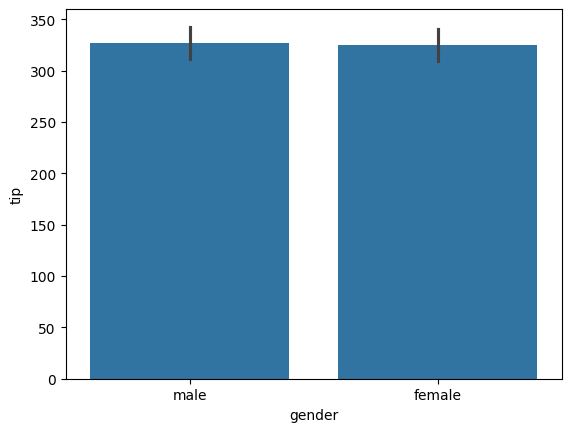

In [ ]:
### 7.2 Tip by Gender
sns.barplot(x='gender', y='tip', data=df)


<Axes: xlabel='time', ylabel='tip'>

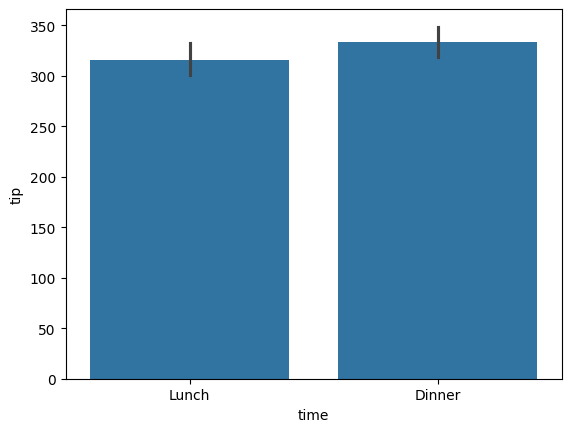

In [ ]:
### 7.3 Tip by Time (Lunch/Dinner)
sns.barplot(x='time', y='tip', data=df)



## 8. Feature Encoding

Machine learning models only understand numbers.


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()

for col in ['gender', 'smoker', 'day', 'time']:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
## 9. Feature Scaling
X = df.drop('tip', axis=1)
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
## 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
## 11. Regression Models (Beginner Friendly)

### 11.1 Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
### 11.2 Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [ ]:
### 11.3 Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
### 11.4 Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [ ]:
### 11.5 Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [ ]:
## 12. Model Evaluation (Simple Explanation)
models = {
    'Linear Regression': lr_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'SVR': svr_pred,
    'Gradient Boosting': gb_pred
}

for name, pred in models.items():
    print(name)
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))
    print('----------------------')

Linear Regression
MAE: 127.02649251585515
RMSE: 161.44864777783914
R2 Score: 0.04296360436075897
----------------------
Decision Tree
MAE: 154.26060402684564
RMSE: 196.1652689244831
R2 Score: -0.412875408715069
----------------------
Random Forest
MAE: 126.46999328859062
RMSE: 159.2846541988678
R2 Score: 0.06844713828018134
----------------------
SVR
MAE: 129.36632398097805
RMSE: 166.07045877723326
R2 Score: -0.012615104392728949
----------------------
Gradient Boosting
MAE: 133.4715900843737
RMSE: 167.49753830954194
R2 Score: -0.030093122497885982
----------------------


###  Explanation of Metrics

* **MAE**: Average error in predictions
* **RMSE**: Penalizes large errors
* **R² Score**: How well the model explains the data (closer to 1 is better)

---

In [ ]:
## 13. Testing with New Customer Data

new_customer = pd.DataFrame({
    'total_bill': [3000],
    'gender': [1],
    'smoker': [0],
    'day': [2],
    'time': [1],
    'size': [4]
})

new_customer_scaled = scaler.transform(new_customer)
predicted_tip = rf.predict(new_customer_scaled)

print('Predicted Tip:', predicted_tip[0])

Predicted Tip: 354.67509999999993




## 14. Final Project Summary (Student Report)

### Project Title

Tip Prediction System for Mama Tee Restaurant

### Aim

To predict customer tip amount using regression machine learning models.

### Conclusion

Regression models can help restaurants understand customer tipping behavior and improve service strategies.

